In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [2]:
reviews = pd.read_csv('IMDB Dataset.csv')
reviews.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
reviews['sentiment'] = np.where(reviews['sentiment'] == 'positive', 1, 0)

In [4]:
sentences = reviews['review'].to_numpy()
labels = reviews['sentiment'].to_numpy()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(sentences, labels, test_size=0.5)
print("Training Data Input Shape: ", X_train.shape)
print("Training Data Output Shape: ", y_train.shape)
print("Testing Data Input Shape: ", X_test.shape)
print("Testing Data Output Shape: ", y_test.shape)

Training Data Input Shape:  (25000,)
Training Data Output Shape:  (25000,)
Testing Data Input Shape:  (25000,)
Testing Data Output Shape:  (25000,)


In [6]:
vocab_size = 10000
oov_tok = "<OOV>"
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

In [7]:
tokenizer.fit_on_texts(X_train)
print("Number of Documents: ", tokenizer.document_count)
print("Number of Words: ", tokenizer.num_words)

Number of Documents:  25000
Number of Words:  10000


In [8]:
tokenizer.word_counts

OrderedDict([('lucio', 44),
             ("fulci's", 50),
             ('cat', 485),
             ('in', 93035),
             ('the', 332463),
             ('brain', 490),
             ('is', 105524),
             ('an', 21564),
             ('inventive', 95),
             ('and', 161746),
             ('somewhat', 922),
             ('egotistical', 20),
             ('tale', 747),
             ('of', 144167),
             ('a', 160849),
             ("director's", 275),
             ('decent', 1168),
             ('into', 9001),
             ('madness', 170),
             ('director', 4069),
             ('question', 658),
             ('fulci', 134),
             ('himself', 2134),
             ('who', 20170),
             ('stars', 1482),
             ('film', 38560),
             ('has', 16333),
             ('become', 1454),
             ('known', 1101),
             ('to', 133766),
             ('horror', 3605),
             ('fans', 1345),
             ('everywhere', 185),
     

In [9]:
tokenizer.word_docs

defaultdict(int,
            {'over': 4647,
             'fans': 1159,
             'head': 1336,
             'despite': 1221,
             'either': 1660,
             "he's": 1929,
             'role': 2452,
             'nearly': 717,
             'with': 17346,
             'this': 22685,
             'italian': 401,
             'acting': 5412,
             'hired': 173,
             'indeed': 642,
             'fun': 2127,
             'york': 532,
             'obviously': 1038,
             "i've": 2764,
             'is': 22353,
             'course': 2100,
             'toll': 27,
             'do': 6572,
             'display': 189,
             'top': 1708,
             'say': 4370,
             'full': 1592,
             'one': 14065,
             'minutes': 2302,
             'therefore': 293,
             "there's": 2253,
             'mile': 95,
             'fulci': 55,
             'on': 15576,
             'laughed': 358,
             'feel': 2447,
             'who

In [10]:
train_sequences = tokenizer.texts_to_sequences(X_train)
print(train_sequences[0])

[7618, 7009, 1158, 9, 2, 1148, 7, 33, 4400, 3, 675, 1, 810, 5, 4, 1884, 529, 80, 2795, 2, 170, 9, 905, 7, 3327, 305, 36, 427, 9, 2, 20, 3327, 46, 434, 554, 6, 182, 466, 2591, 15, 987, 4000, 5, 1, 3, 16, 50, 285, 15, 29, 46, 2026, 176, 17, 48, 5, 2, 1, 3, 88, 2634, 105, 123, 6, 1577, 2, 2915, 259, 38, 2, 1, 568, 9, 105, 37, 1, 1, 6, 4, 132, 77, 1, 6, 335, 17, 9907, 9, 987, 1, 31, 2, 96, 6, 2, 349, 21, 585, 3114, 554, 15, 987, 167, 882, 1, 43, 23, 180, 585, 3, 898, 387, 10, 36, 151, 3327, 7, 126, 132, 184, 31, 12, 1, 16, 1, 37, 23, 3, 11, 46, 616, 93, 9483, 21, 7009, 1745, 1090, 3, 244, 933, 1, 80, 2795, 837, 44, 32, 49, 29, 105, 7009, 681, 90, 130, 30, 25, 1745, 1090, 344, 15, 25, 3896, 13, 29, 46, 815, 6, 64, 44, 25, 446, 46, 564, 10, 655, 305, 6, 187, 54, 591, 15, 4, 1, 790, 7009, 105, 15, 1, 16, 2, 1616, 8, 8, 198, 191, 6, 133, 2, 111, 9, 12, 20, 7, 425, 2682, 47, 7, 28, 128, 9, 880, 13, 2121, 4, 6220, 3, 45, 65, 1139, 6, 27, 1449, 30, 16, 189, 45, 111, 3, 45, 2981, 3327, 306, 2, 479

In [11]:
# the following is to see the lengths of the first ten sentences.
[len(train_sequences[i]) for i in range(10)]

[586, 266, 308, 239, 155, 276, 164, 167, 173, 120]

In [12]:
sequence_length = 200
train_padded = pad_sequences(train_sequences, maxlen=sequence_length, padding='post', truncating='post')

In [13]:
test_sequences = tokenizer.texts_to_sequences(X_test)
test_padded = pad_sequences(test_sequences, maxlen=sequence_length, padding='post', truncating='post')

In [19]:
model = Sequential()
embedding_dim = 16
model.add(Embedding(vocab_size, embedding_dim, input_length=sequence_length))

In [20]:
lstm_out = 32
model.add(Bidirectional(LSTM(lstm_out)))

In [21]:
model.add(Dense(10, activation='relu'))	
model.add(Dense(1, activation='sigmoid'))

In [22]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 16)           160000    
                                                                 
 bidirectional (Bidirectiona  (None, 64)               12544     
 l)                                                              
                                                                 
 dense (Dense)               (None, 10)                650       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 173,205
Trainable params: 173,205
Non-trainable params: 0
_________________________________________________________________
None


In [24]:
checkpoint_filepath = os.getcwd()
model_checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath, save_weights_only=False, monitor='val_loss', mode='min', save_best_only=True)
callbacks = [EarlyStopping(patience=2), model_checkpoint_callback]

In [25]:
history = model.fit(train_padded, y_train, epochs=10, validation_data=(test_padded, y_test), callbacks=callbacks)

Epoch 1/10
782/782 [==============================] - ETA: 0s - loss: 0.4657 - accuracy: 0.7668

INFO:tensorflow:Assets written to: c:\Users\yj313\Desktop\LAB\LLM-Project\assets


INFO:tensorflow:Assets written to: c:\Users\yj313\Desktop\LAB\LLM-Project\assets


782/782 [==============================] - 96s 119ms/step - loss: 0.4657 - accuracy: 0.7668 - val_loss: 0.3468 - val_accuracy: 0.8620
Epoch 2/10
782/782 [==============================] - ETA: 0s - loss: 0.2712 - accuracy: 0.8940

INFO:tensorflow:Assets written to: c:\Users\yj313\Desktop\LAB\LLM-Project\assets


INFO:tensorflow:Assets written to: c:\Users\yj313\Desktop\LAB\LLM-Project\assets


782/782 [==============================] - 101s 130ms/step - loss: 0.2712 - accuracy: 0.8940 - val_loss: 0.3274 - val_accuracy: 0.8611
Epoch 3/10
782/782 [==============================] - 82s 105ms/step - loss: 0.2120 - accuracy: 0.9216 - val_loss: 0.3514 - val_accuracy: 0.8588
Epoch 4/10
782/782 [==============================] - 87s 111ms/step - loss: 0.1719 - accuracy: 0.9397 - val_loss: 0.3759 - val_accuracy: 0.8618


In [27]:
metrics_df = pd.DataFrame(history.history)
print(metrics_df)

       loss  accuracy  val_loss  val_accuracy
0  0.465687   0.76680  0.346782       0.86200
1  0.271235   0.89396  0.327385       0.86108
2  0.211995   0.92160  0.351406       0.85876
3  0.171907   0.93972  0.375873       0.86180


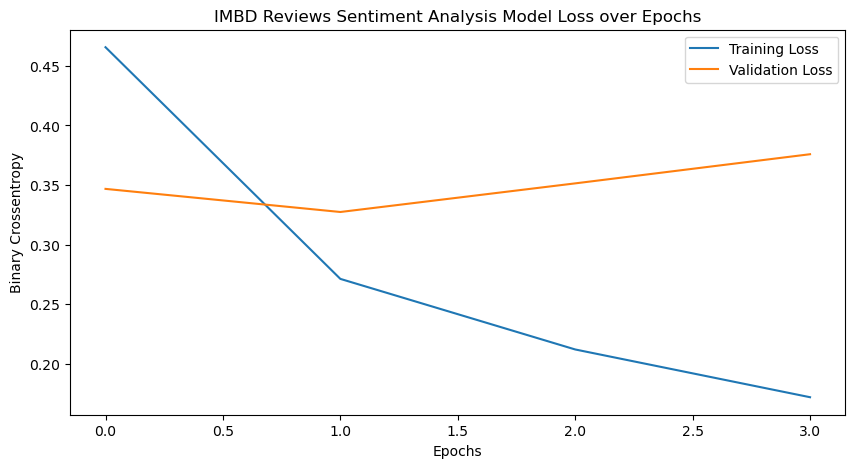

In [28]:
plt.figure(figsize=(10,5))
plt.plot(metrics_df.index, metrics_df.loss)
plt.plot(metrics_df.index, metrics_df.val_loss)
plt.title('IMBD Reviews Sentiment Analysis Model Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Binary Crossentropy')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

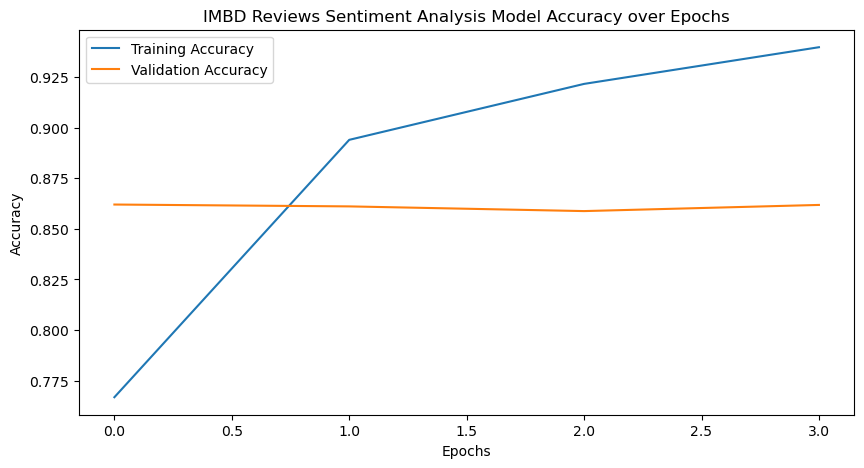

In [29]:
plt.figure(figsize=(10,5))
plt.plot(metrics_df.index, metrics_df.accuracy)
plt.plot(metrics_df.index, metrics_df.val_accuracy)
plt.title('IMBD Reviews Sentiment Analysis Model Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()